### Preparing noise to classify into electrons, muons, alpha and noise

To include the noise as a third class, we need to select it from the electron files in `cropped_electrons3` and put them in a new directory called crop `cropped_noise3`. 

In [1]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import glob

We will selected the noise stored in the electron files:

In [2]:
path = '/gpfs/res_scratch/damic/TFM_DM/CCDimg_fullNoise'
num_files = len(glob.glob1(path,"*.npz"))
print('We got', num_files,'files')

num_electrons = len(glob.glob1(path,"*11.npz"))
num_alphas = len(glob.glob1(path,"*1000020040.npz"))
num_muons = len(glob.glob1(path,"*13.npz"))
num_muons2 = len(glob.glob1('/gpfs/projects/damic/new_mu/',"*13.npz"))

print('There are',num_electrons,'electrons,',num_alphas,'alphas and ', num_muons+num_muons2, 'muons')

We got 18277 files
There are 5835 electrons, 7218 alphas and  7304 muons


In [3]:
# The path to the directory where the e,mu,a files are stored
original_dataset_dir = '/gpfs/projects/damic/cropped_electrons3'

In [4]:
# The directory where we will store our noise already preprocessed
base_dir = '/gpfs/projects/damic/cropped_noise3'
#os.mkdir(base_dir)

In [ ]:
#destination directory 
dest = base_dir

#selecting electrons
files = glob.glob1(original_dataset_dir,"*11.npz")

for index, file in enumerate(files):
    
    #loading each image as a numpy array
    noise_a = np.load(os.path.join(original_dataset_dir, files[index]))['noise']

    #copying to the 'cropped_noise3' directory
    np.savez(os.path.join(dest, file), energy=noise_a)
    print(index)

Text(0.5, 1.0, 'Electron noise')

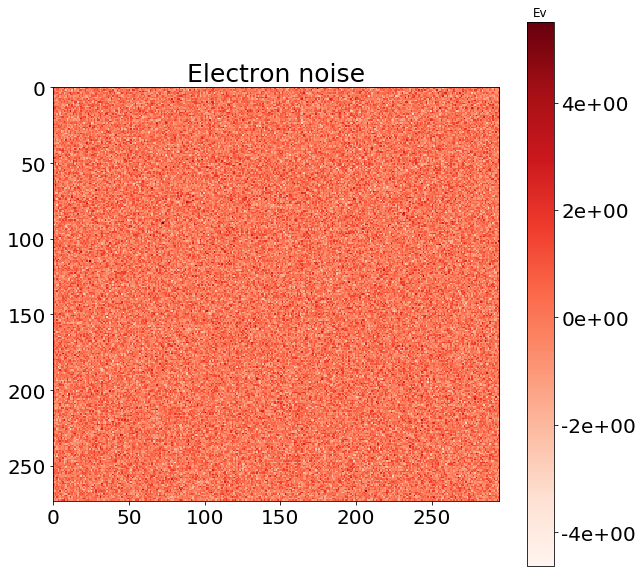

In [7]:
files = os.listdir(dest)
f=76
noise = np.load(os.path.join(dest, files[f]))['energy']

fig_n = plt.figure(figsize=(10,10))
plt.imshow(noise, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Electron noise", fontsize = 25)

In [8]:
i = 0
for filename in os.listdir(dest):
    os.rename(os.path.join(dest,filename), os.path.join(dest,'noise_file_from_e'+str(i)+'-0.npz'))
    i = i +1

In [9]:
files = os.listdir(dest)
files[f]

'noise_file_from_e2033-0.npz'